<a href="https://colab.research.google.com/github/MostafaJahanian/Free_Projects/blob/main/rice_image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data From Kaggle

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download muratkokludataset/rice-image-dataset

 93% 204M/219M [00:07<00:00, 20.7MB/s]
100% 219M/219M [00:07<00:00, 32.0MB/s]


In [ ]:
! unzip rice-image-dataset.zip

## Create a dataset From Images

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [7]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                        validation_split = 0.2,
                                                        subset = 'training', 
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 50)

test_set = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 50)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [ ]:
train_data.cardinality().numpy(),  test_set.cardinality().numpy()

(1200, 300)

In [ ]:
train_set = train_data.take(1000)
val_set = train_data.skip(1000)

In [ ]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1000, 200)

In [ ]:
data_dir = pathlib.Path('/content/Rice_Image_Dataset')

for label in train_data.class_names:
  images = list(data_dir.glob(f'{label}/*'))
  print(f'{label} : {len(images)}')

Arborio : 15000
Basmati : 15000
Ipsala : 15000
Jasmine : 15000
Karacadag : 15000


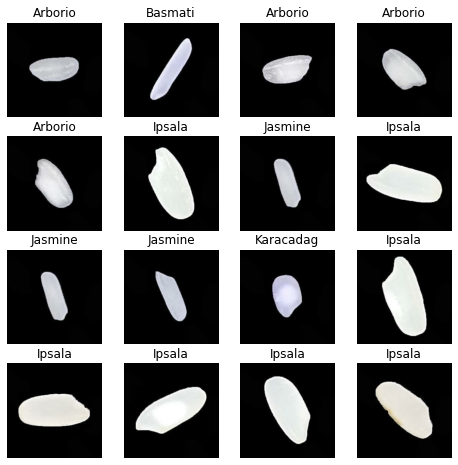

In [ ]:
# print random images from the train set
plt.figure(figsize = (8, 8))
for images, labels in train_set.take(1):
  for i in range(16):
    index = random.randint(0, len(images))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[index]])
    plt.axis(False)

## Taining CNNs on the train images

In [ ]:
for images_batch, labels_batch in train_set:
  print(images_batch.shape)
  print(labels_batch.shape)
  break

(50, 256, 256, 3)
(50,)


In [ ]:
def plot_training_curves(history_df):
  plt.figure(figsize = (13, 4), dpi = 120)
  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
  plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  ax = plt.subplot(1, 2, 2) 
  plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
  plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

Epoch 1/5
1000/1000 [==============================] - 200s 188ms/step - loss: 0.1922 - accuracy: 0.9667 - val_loss: 0.0750 - val_accuracy: 0.9744
Epoch 2/5
1000/1000 [==============================] - 189s 188ms/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 0.0467 - val_accuracy: 0.9849
Epoch 3/5
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0279 - accuracy: 0.9901 - val_loss: 0.0496 - val_accuracy: 0.9841
Epoch 4/5
1000/1000 [==============================] - 188s 188ms/step - loss: 0.0189 - accuracy: 0.9933 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 5/5
1000/1000 [==============================] - 187s 186ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0422 - val_accuracy: 0.9886


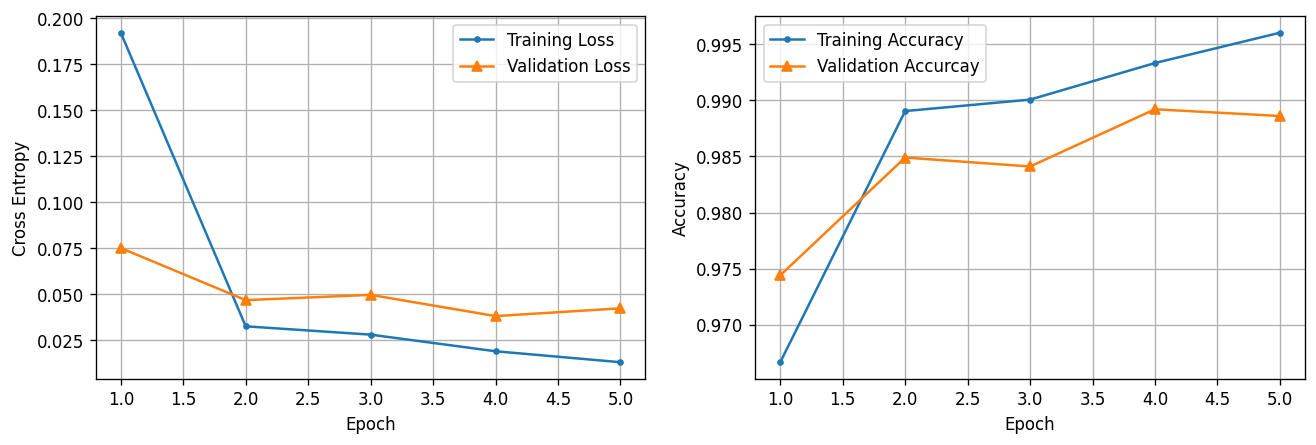

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

--- In the plots above, there is a minor tendency to overfitting. However, because of the few epochs that the model has been trained, this issue might not be significant in longer runs.

In [ ]:
tf.random.set_seed(42)

cnn_2 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_2 = cnn_2.fit(train_set, epochs = 20, validation_data = val_set)

Epoch 1/20
1000/1000 [==============================] - 189s 188ms/step - loss: 0.1799 - accuracy: 0.9674 - val_loss: 0.0511 - val_accuracy: 0.9831
Epoch 2/20
1000/1000 [==============================] - 186s 185ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 3/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0616 - val_accuracy: 0.9797
Epoch 4/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 5/20
1000/1000 [==============================] - 189s 188ms/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0481 - val_accuracy: 0.9869
Epoch 6/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0518 - val_accuracy: 0.9885
Epoch 7/20
1000/1000 [==============================] - 187s 187ms/step - loss: 0.0087 - accuracy: 0.9970 - val_

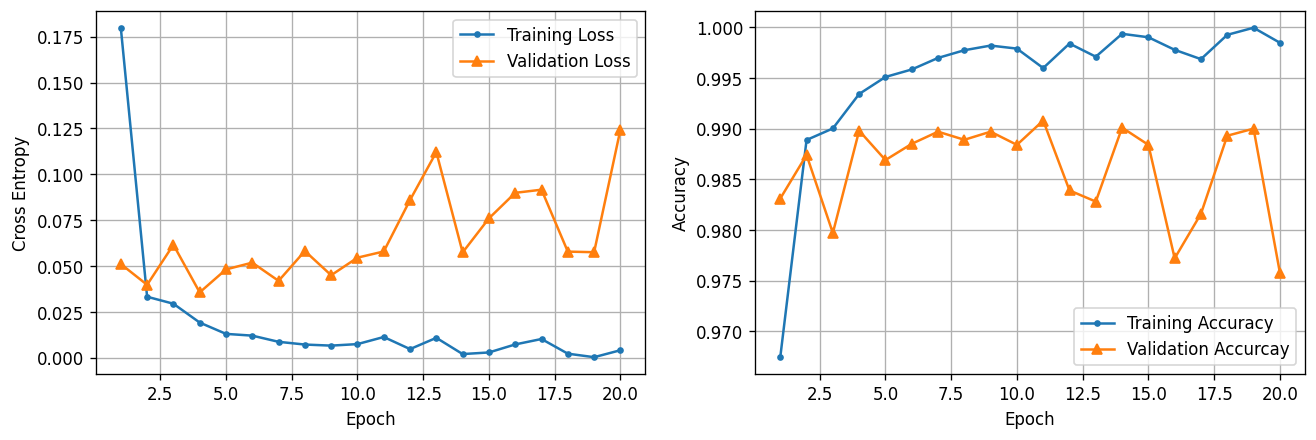

In [ ]:
plot_training_curves(pd.DataFrame(history_2.history))

--- Inceasing epochs amplified the tendency of the model for overfitting. After 10 epoch, both loss and accuracy curves of the validation set flactuated further from those of the training set. Aiming to solve this issue, two dropout layers are being added to the model.

In [ ]:
tf.random.set_seed(42)

cnn_3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(rate = 0.3),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(rate = 0.2),
    layers.Dense(5, activation = 'softmax')
])

cnn_3.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_3 = cnn_3.fit(train_set, epochs = 20, validation_data = val_set)

Epoch 1/20
1000/1000 [==============================] - 196s 195ms/step - loss: 0.1402 - accuracy: 0.9676 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 2/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.0572 - val_accuracy: 0.9827
Epoch 3/20
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0276 - accuracy: 0.9902 - val_loss: 0.0514 - val_accuracy: 0.9858
Epoch 4/20
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0650 - val_accuracy: 0.9789
Epoch 5/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 6/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0405 - val_accuracy: 0.9896
Epoch 7/20
1000/1000 [==============================] - 192s 192ms/step - loss: 0.0100 - accuracy: 0.9968 - val_

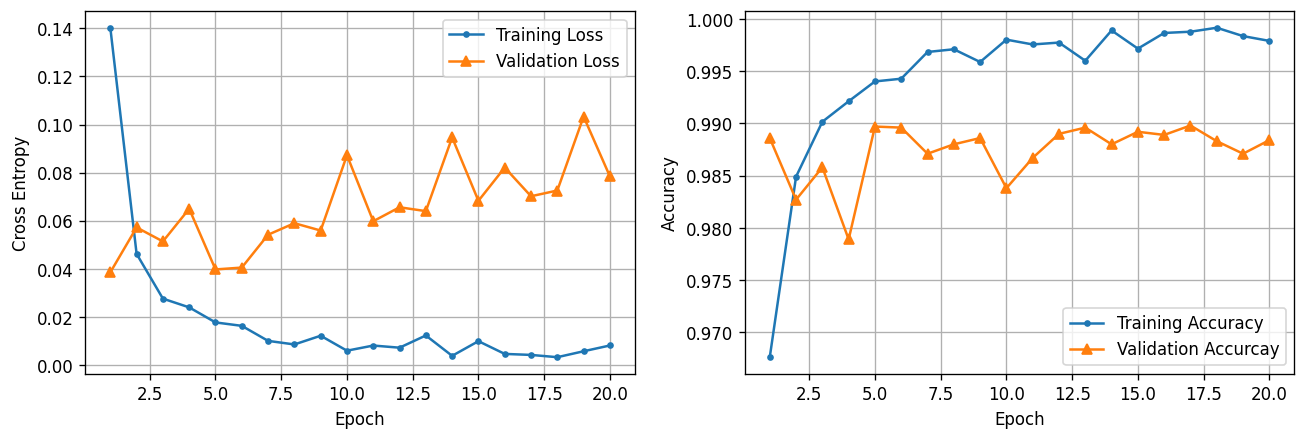

In [ ]:
plot_training_curves(pd.DataFrame(history_3.history))

--- Although the model shows more stability comparing to the previous model which does not have dropout layers, the improvement is no way significant. Thus, I try another model with augmentation layers but without dropout layers to check for their effect in isolation. Also, the number of epochs will be set to 15 as it seems that the model does no change much after 15 epochs.

In [ ]:
tf.random.set_seed(42)

cnn_4 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_4.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_4 = cnn_4.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 206s 193ms/step - loss: 0.2303 - accuracy: 0.9659 - val_loss: 0.0388 - val_accuracy: 0.9867
Epoch 2/15
1000/1000 [==============================] - 194s 193ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 3/15
1000/1000 [==============================] - 193s 192ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0661 - val_accuracy: 0.9781
Epoch 4/15
1000/1000 [==============================] - 195s 194ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.1276 - val_accuracy: 0.9648
Epoch 5/15
1000/1000 [==============================] - 193s 192ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 6/15
1000/1000 [==============================] - 194s 194ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 7/15
1000/1000 [==============================] - 193s 192ms/step - loss: 0.0709 - accuracy: 0.9816 - val_

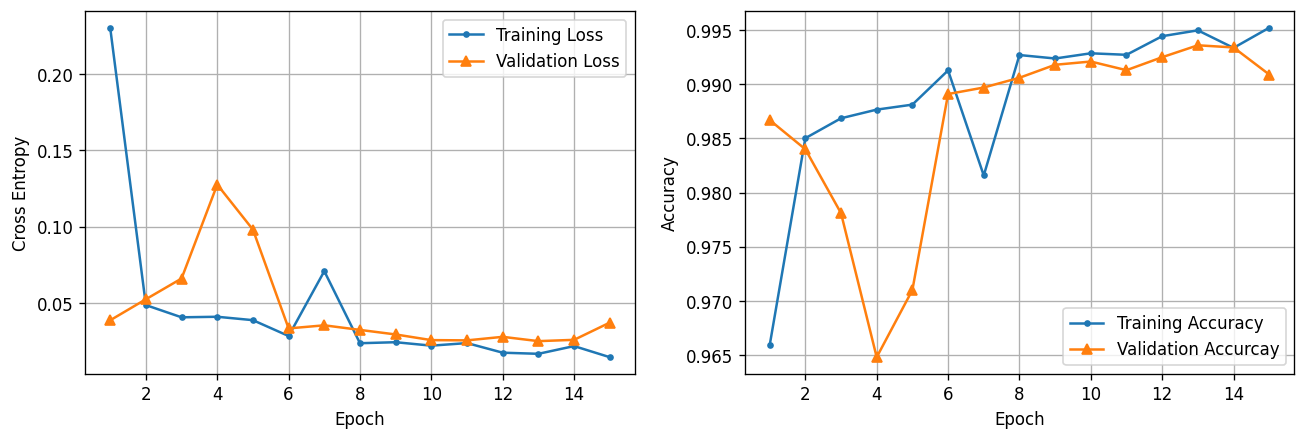

In [ ]:
plot_training_curves(pd.DataFrame(history_4.history))

--- Adding augmetation layers helped with achieving much better results in comparison with former models. It seems with these layers, overfitting is not much of a problem anymore. As a result, retaining the structure of this model, some layers will be added to see if better resutls are attainable.

In [ ]:
tf.random.set_seed(42)

cnn_5 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_5.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_5 = cnn_5.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 197s 195ms/step - loss: 0.1573 - accuracy: 0.9571 - val_loss: 0.1060 - val_accuracy: 0.9629
Epoch 2/15
1000/1000 [==============================] - 193s 193ms/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.0509 - val_accuracy: 0.9832
Epoch 3/15
1000/1000 [==============================] - 195s 194ms/step - loss: 0.0472 - accuracy: 0.9847 - val_loss: 0.0462 - val_accuracy: 0.9854
Epoch 4/15
1000/1000 [==============================] - 195s 194ms/step - loss: 0.0368 - accuracy: 0.9877 - val_loss: 0.0205 - val_accuracy: 0.9936
Epoch 5/15
1000/1000 [==============================] - 194s 194ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 6/15
1000/1000 [==============================] - 194s 194ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0297 - val_accuracy: 0.9919
Epoch 7/15
1000/1000 [==============================] - 194s 194ms/step - loss: 0.0306 - accuracy: 0.9900 - val_

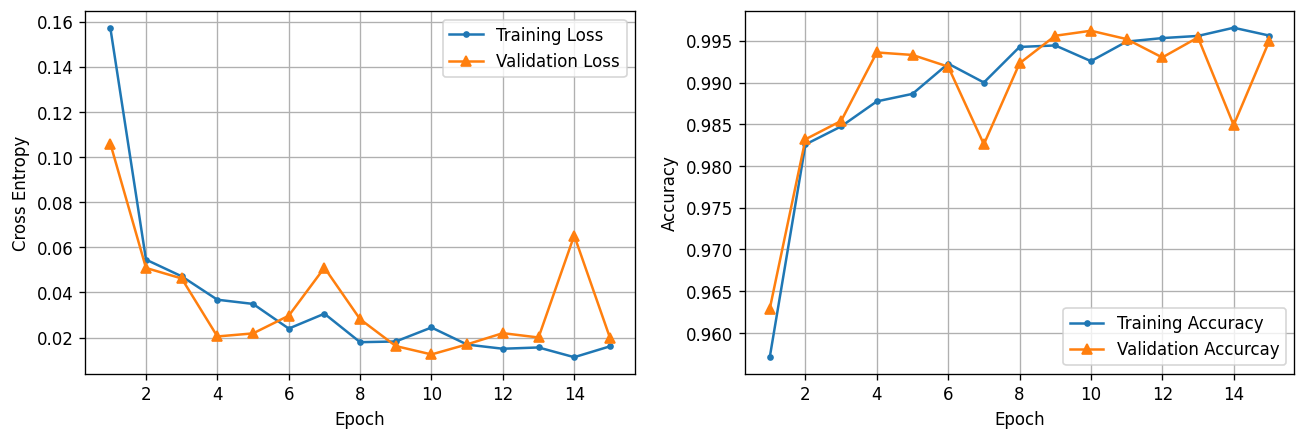

In [ ]:
plot_training_curves(pd.DataFrame(history_5.history))

--- Comparing the plots of the latest model with those of the previous one, it seems that the performance of the model improved with the price of losing consistency to some extent. Aiming to check the validity of this comparison, plots of both models are being drawn.

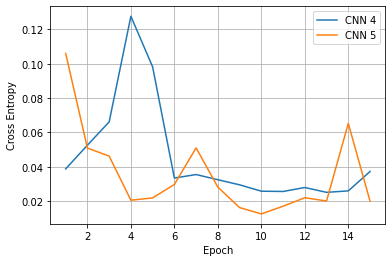

In [ ]:
history_4_df = pd.DataFrame(history_4.history)
history_5_df = pd.DataFrame(history_5.history)

plt.plot(range(1, 16), history_4_df['val_loss'], label = 'CNN 4')
plt.plot(range(1, 16), history_5_df['val_loss'], label = 'CNN 5')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.legend()
plt.grid()
plt.show()

--- It can be concluded that the model 5 performed slightly better in terms of loss, as in almost all epochs then loss of model 5 if less than model 4. However, some minor inconsistensy can be seen after 6th epoch, while the model 4 reached to a more consistent performance. 

In [ ]:
tf.random.set_seed(42)

cnn_6 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_6.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_6 = cnn_6.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 232s 228ms/step - loss: 0.1485 - accuracy: 0.9620 - val_loss: 0.0820 - val_accuracy: 0.9734
Epoch 2/15
1000/1000 [==============================] - 226s 226ms/step - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 3/15
1000/1000 [==============================] - 226s 225ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0193 - val_accuracy: 0.9939
Epoch 4/15
1000/1000 [==============================] - 226s 226ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0899 - val_accuracy: 0.9702
Epoch 5/15
1000/1000 [==============================] - 227s 226ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0262 - val_accuracy: 0.9914
Epoch 6/15
1000/1000 [==============================] - 226s 226ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0235 - val_accuracy: 0.9930
Epoch 7/15
1000/1000 [==============================] - 227s 226ms/step - loss: 0.0315 - accuracy: 0.9902 - val_

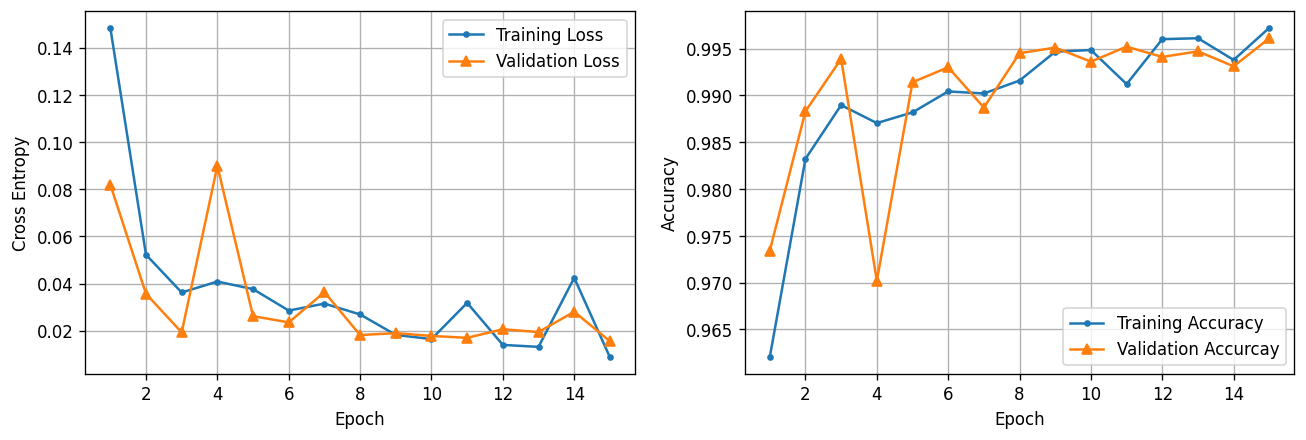

In [ ]:
plot_training_curves(pd.DataFrame(history_6.history))

--- Increasing the number of units of the only Dense layer to 1000 did not changed the results much !!!

In [ ]:
tf.random.set_seed(42)

cnn_7 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_7.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_7 = cnn_7.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 217s 214ms/step - loss: 0.1455 - accuracy: 0.9547 - val_loss: 0.0983 - val_accuracy: 0.9700
Epoch 2/15
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0862 - accuracy: 0.9706 - val_loss: 0.0813 - val_accuracy: 0.9739
Epoch 3/15
1000/1000 [==============================] - 215s 215ms/step - loss: 0.0718 - accuracy: 0.9765 - val_loss: 0.0316 - val_accuracy: 0.9912
Epoch 4/15
1000/1000 [==============================] - 214s 213ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 5/15
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 6/15
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0181 - val_accuracy: 0.9948
Epoch 7/15
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0185 - accuracy: 0.9946 - val_

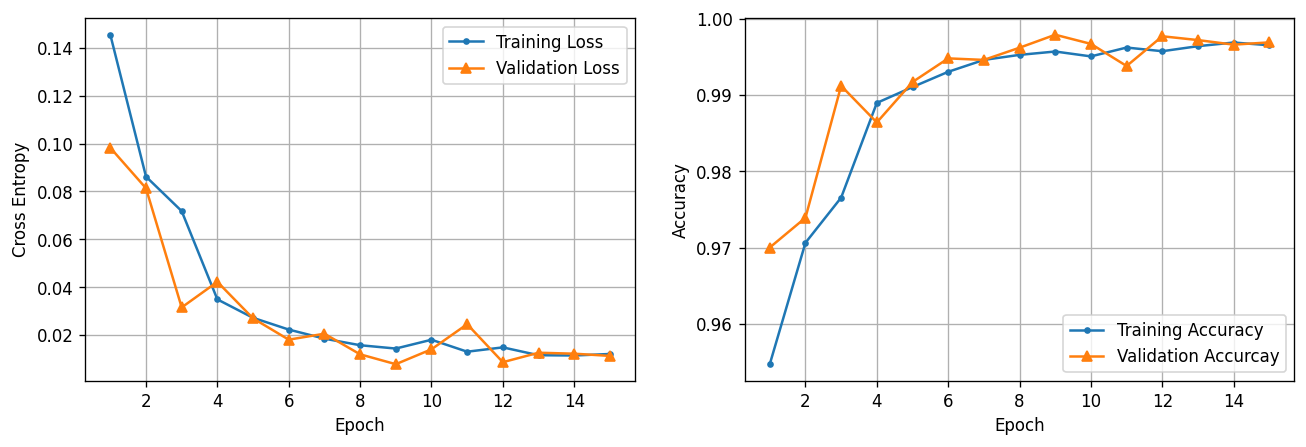

In [ ]:
plot_training_curves(pd.DataFrame(history_7.history))

--- Expanding convolution part of the network resulted in much more consistent performance as the plots above suggest. Also, both accuracy and loss has witnessed a significant improvement in comparison with previous models.

In [ ]:
tf.random.set_seed(42)

cnn_8 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(250, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_8.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_8 = cnn_8.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 224s 211ms/step - loss: 0.1436 - accuracy: 0.9519 - val_loss: 0.1271 - val_accuracy: 0.9676
Epoch 2/15
1000/1000 [==============================] - 211s 210ms/step - loss: 0.0856 - accuracy: 0.9714 - val_loss: 0.1106 - val_accuracy: 0.9640
Epoch 3/15
1000/1000 [==============================] - 211s 210ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0422 - val_accuracy: 0.9854
Epoch 4/15
1000/1000 [==============================] - 210s 210ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0335 - val_accuracy: 0.9901
Epoch 5/15
1000/1000 [==============================] - 210s 210ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0174 - val_accuracy: 0.9946
Epoch 6/15
1000/1000 [==============================] - 209s 209ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0175 - val_accuracy: 0.9949
Epoch 7/15
1000/1000 [==============================] - 210s 210ms/step - loss: 0.0196 - accuracy: 0.9942 - val_

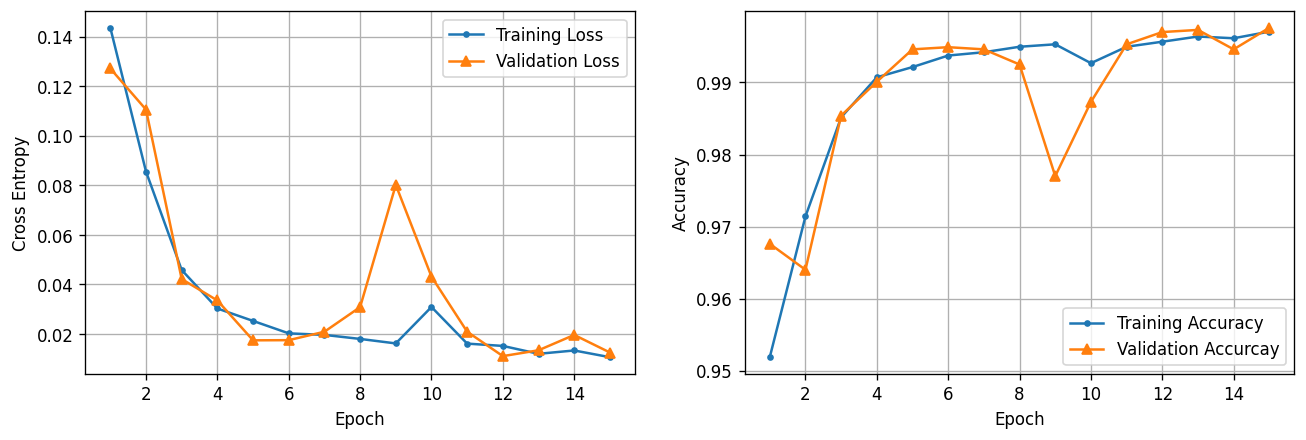

In [ ]:
plot_training_curves(pd.DataFrame(history_8.history))

--- Comparing this model with model 7, which does not have the extra Dense layer that this model have, the results are no better. Consistency in model 7 is more visible, and regarding loss, model 7 did its job much better.

In [ ]:
tf.random.set_seed(42)

cnn_9 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(2000, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_9.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_9 = cnn_9.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
1000/1000 [==============================] - 242s 241ms/step - loss: 0.1169 - accuracy: 0.9632 - val_loss: 0.0919 - val_accuracy: 0.9671
Epoch 2/15
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0435 - val_accuracy: 0.9869
Epoch 3/15
1000/1000 [==============================] - 243s 242ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0249 - val_accuracy: 0.9921
Epoch 4/15
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0425 - val_accuracy: 0.9858
Epoch 5/15
1000/1000 [==============================] - 241s 241ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0972 - val_accuracy: 0.9717
Epoch 6/15
1000/1000 [==============================] - 242s 241ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0134 - val_accuracy: 0.9969
Epoch 7/15
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0215 - accuracy: 0.9934 - val_

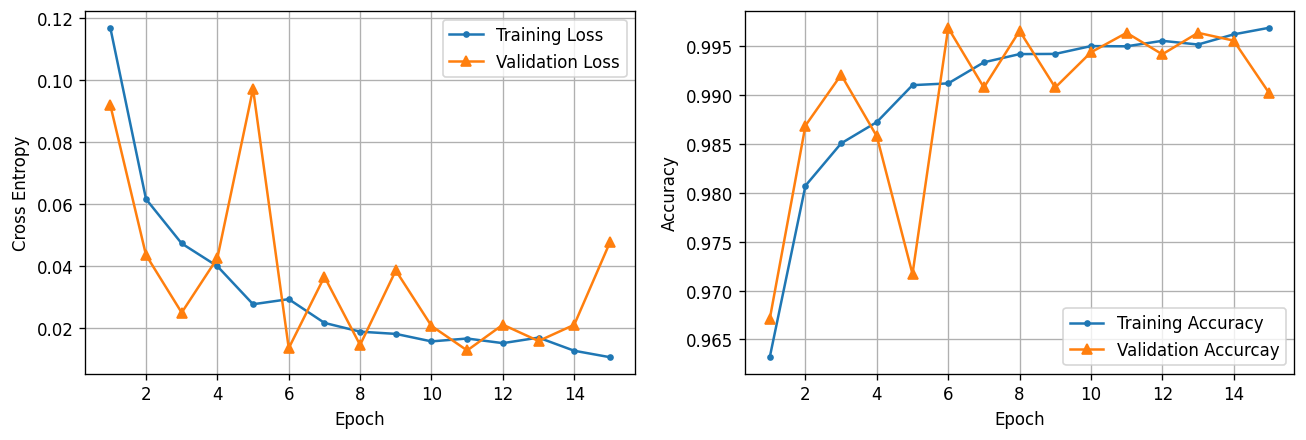

In [ ]:
plot_training_curves(pd.DataFrame(history_9.history))

--- Increasing the number of hidden units to 2000 made the model inconsistent, and less accurate with the model that has the exact same structure, but 1000 units in its dense layer(model 7). As it seems making changes on the classification part cannot make the model better, and considering that the model is quite computiationally extensive, and the fact that the resources are limited, the structure of the model 7 is the best I had come up with.

--- Aiming to find the best trained model, a callback is being used with model 7 to save the model with the least validation loss from all the epochs.

## Saving The Best Model

In [8]:
from google.colab import drive
drive.mount('/content/grdive')

Mounted at /content/grdive


In [ ]:
tf.random.set_seed(42)

cnn_final = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(),
    layers.RandomContrast(0.3),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
])

cnn_final.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

model_checkpoint = keras.callbacks.ModelCheckpoint(filepath = '/content/grdive/MyDrive/rice_classification_model.hdf5',
                                                   monitor = 'val_loss',
                                                   mode = 'min',
                                                   verbose = 1,
                                                   save_best_only = True,
                                                   save_weights_only = False
                                                   )

history_final = cnn_final.fit(train_set, epochs = 40, validation_data = val_set, callbacks = [model_checkpoint])

Epoch 1/40
1000/1000 [==============================] - ETA: 0s - loss: 0.1217 - accuracy: 0.9604
Epoch 1: val_loss improved from inf to 0.09495, saving model to /content/grdive/MyDrive/rice_classification_model.hdf5
1000/1000 [==============================] - 236s 222ms/step - loss: 0.1217 - accuracy: 0.9604 - val_loss: 0.0950 - val_accuracy: 0.9673
Epoch 2/40
1000/1000 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9827
Epoch 2: val_loss improved from 0.09495 to 0.05601, saving model to /content/grdive/MyDrive/rice_classification_model.hdf5
1000/1000 [==============================] - 231s 231ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0560 - val_accuracy: 0.9795
Epoch 3/40
1000/1000 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9870
Epoch 3: val_loss improved from 0.05601 to 0.02974, saving model to /content/grdive/MyDrive/rice_classification_model.hdf5
1000/1000 [==============================] - 230s 229ms/step - loss

--- Due to the limited availability of gpu-enabled sessions on free version of google colab, I'm not able to train the model more than 38 epochs. Anyway, the best model that has been saved has acceptable loss and accuracy on both validation and training set. Now the model will go through evaluation process to see if it can generalize well enough.

## Evaluation Of The Best Model

In [9]:
model = keras.models.load_model('/content/grdive/MyDrive/rice_classification_model.hdf5')

In [ ]:
model.evaluate(val_set)

200/200 [==============================] - 106s 90ms/step - loss: 0.0088 - accuracy: 0.9983


[0.008799901232123375, 0.9983000159263611]

In [ ]:
model.evaluate(test_set)

300/300 [==============================] - 28s 91ms/step - loss: 0.0126 - accuracy: 0.9979


[0.012630848214030266, 0.997866690158844]

--- Model's performance on the test set is quite similar to those of train and validation set.

In [10]:
X_test, y_test = None, None
for images, labels in test_set.take(100):
  if X_test == None or y_test == None:
    X_test = images
    y_test = labels
  else:
    X_test = tf.concat([X_test, images], axis = 0)
    y_test = tf.concat([y_test, labels], axis = 0)
  
X_test.shape, y_test.shape

(TensorShape([5000, 256, 256, 3]), TensorShape([5000]))

--- Unpacking all batches in test set causes the session to run out of gpu memory. As we now that the accuracy of the model on the test set is 99.79, and that means only less than 0.25 percent of the images are misclassified, only 100 batches has been unpacked to represent the whole test set in the evaluation process. 

--- A complete evaluatoin needs considerably more GPU and RAM !!!

In [11]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)
metrics.accuracy_score(y_test, y_pred)

0.998

In [13]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       949
           1       1.00      1.00      1.00       990
           2       1.00      1.00      1.00      1004
           3       1.00      1.00      1.00      1019
           4       1.00      1.00      1.00      1038

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


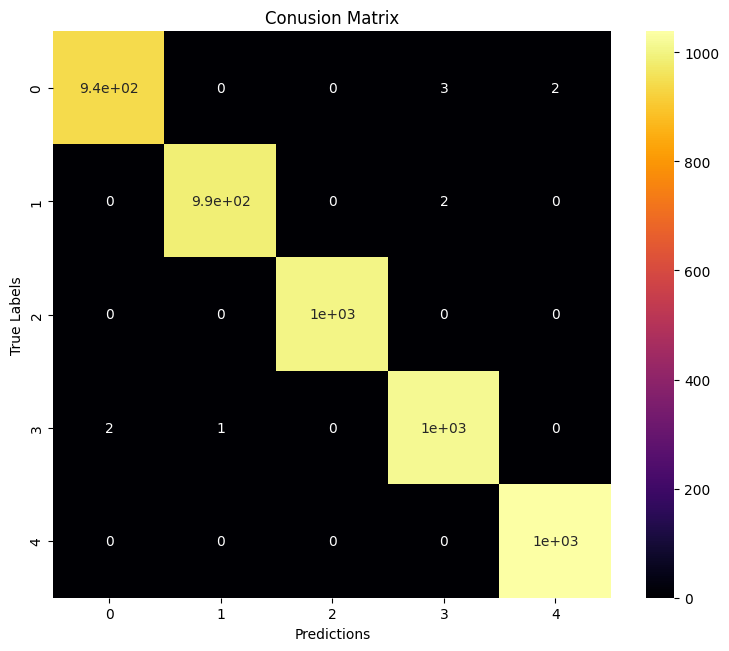

In [26]:
print(test_set.class_names)
plt.figure(figsize = (9, 7.5), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'inferno')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

--- The model has done well. I believe that based on all the metrics, the model has reached the *state-of-art*. 

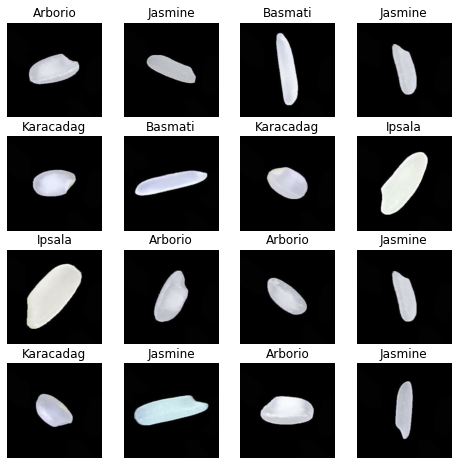

In [35]:
# print random images from the test set
plt.figure(figsize = (8, 8))
for images, labels in test_set.take(1):
  for i in range(16):
    index = random.randint(0, len(images))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[index]])
    plt.axis(False)